In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400
import seaborn as sns
%matplotlib inline
import datetime
sns.set_style('whitegrid')

In [2]:
# Load Data
df = pd.read_csv('adult.csv')

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Check levels of categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_col:
    print(f'Variable: {col}\n{df[col].value_counts()}\n')

Variable: workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Variable: education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Variable: marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Variable: occupation
Prof-specialt

In [7]:
# Convert missing entries identified by '?' to np.nan
for col in cat_col:
    df[col] = df[col].replace('?', np.nan, regex=False)

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
# Count levels of categorical columns
for col in cat_col:
    print(f'Variable: {col}\n{df[col].value_counts().count()}\n')

Variable: workclass
8

Variable: education
16

Variable: marital-status
7

Variable: occupation
14

Variable: relationship
6

Variable: race
5

Variable: gender
2

Variable: native-country
41

Variable: income
2



76.1% of the records have income <= 50K, 23.9% is > 50K.


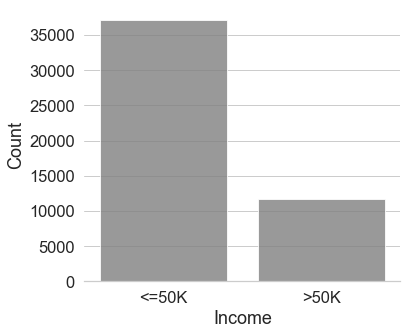

In [10]:
# Is the dataset balanced?
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(6,5))
ax = sns.countplot(x='income', data=df, color='grey', alpha=.8)
sns.despine(left=True)
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()

count = df.income.value_counts(normalize=True)
print(f'{count[0].round(3)*100}% of the records have income <= 50K, {count[1].round(3)*100}% is > 50K.')

## Are richer people older? 

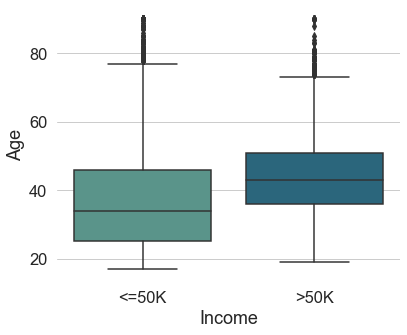

In [11]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(6,5))
sns.boxplot(y='age', x='income', data=df, palette='crest')
sns.despine(left=True, bottom=True)
plt.xlabel('Income')
plt.ylabel('Age')
plt.tight_layout()

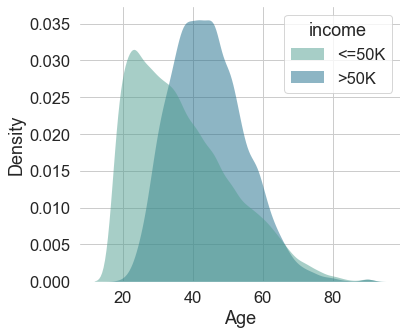

In [12]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(6,5))
sns.kdeplot(
   data=df, x='age', hue='income',
   fill=True, common_norm=False, palette='crest',
   alpha=.5, linewidth=0,
)
plt.xlabel('Age')
plt.ylabel('Density')
sns.despine(left=True, bottom=True)
plt.tight_layout()

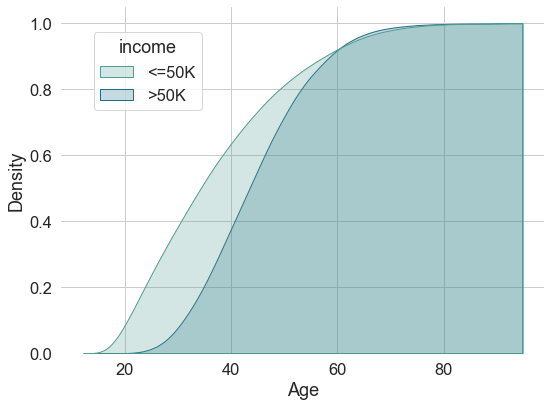

In [13]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(8,6))
ax = sns.kdeplot(
    data=df, x='age', hue='income', palette='crest',
    cumulative=True, common_norm=False, common_grid=True,
    fill=True
)
plt.xlabel('Age')
plt.ylabel('Density')
sns.despine(left=True, bottom=True)
ax.legend_.set_bbox_to_anchor((0.05, 0.95))
ax.legend_._set_loc(2)
plt.tight_layout()

As expected, the richer people distribution peaks for people in their late 30's and 40's, while people with income lower than \$50K are more likely to be younger, in their 20's, as they have just begun their professional life.

## Do richer people work more?

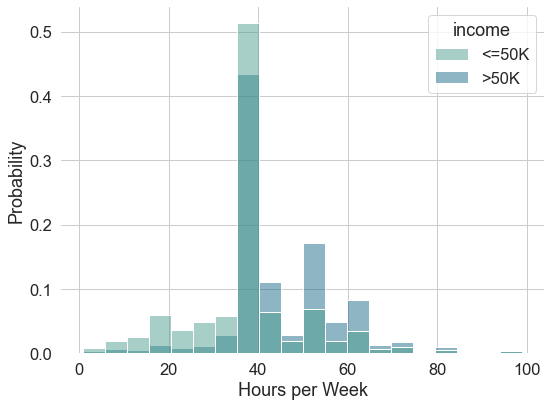

In [14]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(8,6))
sns.histplot(bins=20,
   data=df, x='hours-per-week', hue='income', palette='crest',
   alpha=.5, common_norm=False, stat="probability", 
)
plt.xlabel('Hours per Week')
plt.ylabel('Probability')
sns.despine(left=True, bottom=True)
plt.tight_layout()

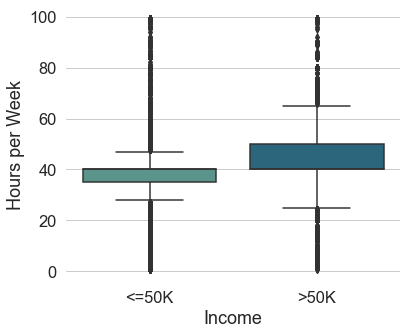

In [15]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(6,5))
sns.boxplot(y='hours-per-week', x='income', data=df, palette='crest')
sns.despine(left=True, bottom=True)
plt.ylabel('Hours per Week')
plt.xlabel('Income')
plt.tight_layout()

High income people tend to work more than low income people. Most high income people work 40-50 hours per week while most low income people work 35-40 hours per week.

## How does the gender affect the income?

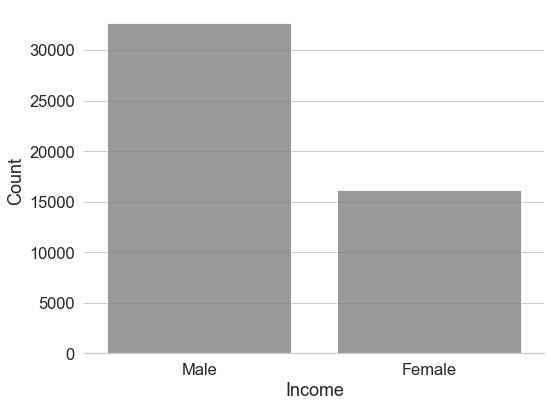

In [16]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(8,6))
ax = sns.countplot(x='gender', data=df, color='grey', alpha=.8)
sns.despine(left=True)
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()

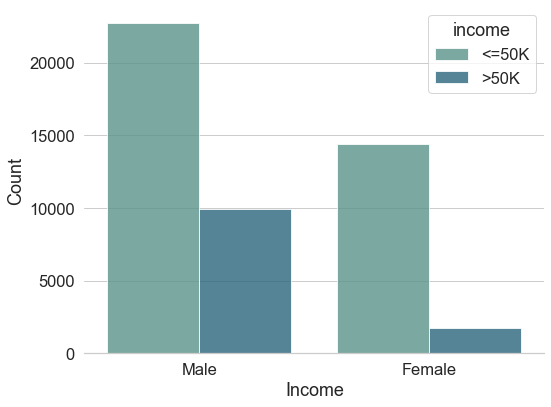

In [17]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(8,6))
ax = sns.countplot(hue='income', data=df, x='gender', palette='crest', alpha=.8)
sns.despine(left=True)
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()

Almost one third of the males, but only about one tenth of the females, have salary above $50K. The disparity is evident, is this possibly related to different employment type between males and females, e.g. full-time vs part-time?

## Are the age and hour-per-week distributions different for different genders? 

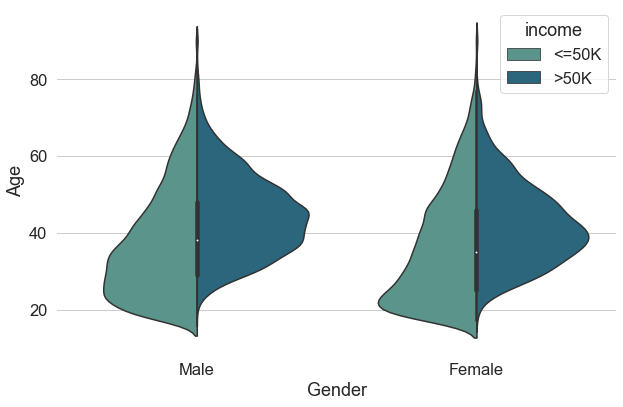

In [18]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(9,6))

sns.violinplot(y='age', hue='income', x='gender', data=df, palette='crest', split=True)
sns.despine(left=True, bottom=True)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()

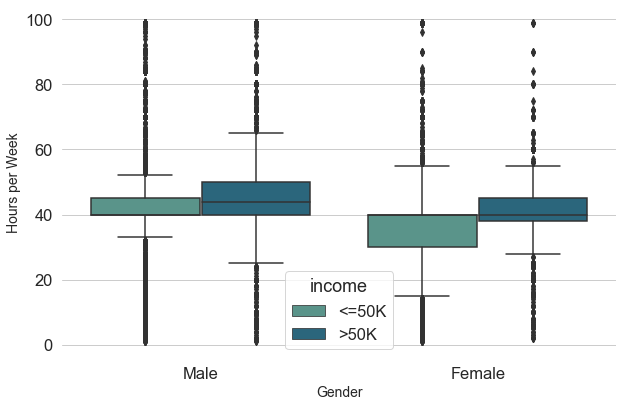

In [19]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(9,6))
sns.boxplot(y='hours-per-week', hue='income', x='gender', data=df, palette='crest')
sns.despine(left=True, bottom=True)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Hours per Week', fontsize=14)
plt.tight_layout()

In [20]:
df.groupby(['gender','income'])['hours-per-week'].quantile(.25)

gender  income
Female  <=50K     30.0
        >50K      38.0
Male    <=50K     40.0
        >50K      40.0
Name: hours-per-week, dtype: float64

In [21]:
df.groupby(['gender','income'])['hours-per-week'].quantile(.5)

gender  income
Female  <=50K     40.0
        >50K      40.0
Male    <=50K     40.0
        >50K      44.0
Name: hours-per-week, dtype: float64

In [22]:
df.groupby(['gender','income'])['hours-per-week'].quantile(.75)

gender  income
Female  <=50K     40.0
        >50K      45.0
Male    <=50K     45.0
        >50K      50.0
Name: hours-per-week, dtype: float64

Most males work more than 40 hours per week, the median for the high income males is 44 hours per week. Most low income females work 30-40 hours per week while the high income work between 38 and 45 hours, slightly less than males.

## Do workclass, education and race affect the salary?

<Figure size 432x288 with 0 Axes>

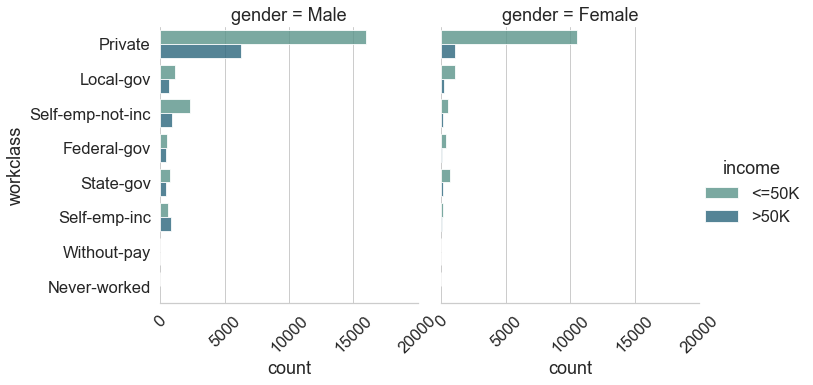

In [23]:
sns.set(font_scale=1.5, style='whitegrid')
plt.figure()
ax = sns.catplot(y='workclass', hue='income', data=df, col='gender', palette='crest',  kind='count', alpha=.8)
ax.set_xticklabels(rotation = 45)
sns.despine(left=True)

Most people work in the private sector, where males earn significantly more than females. Government positions pay males more than females. Most self-employed males make more than $50K.

<Figure size 432x288 with 0 Axes>

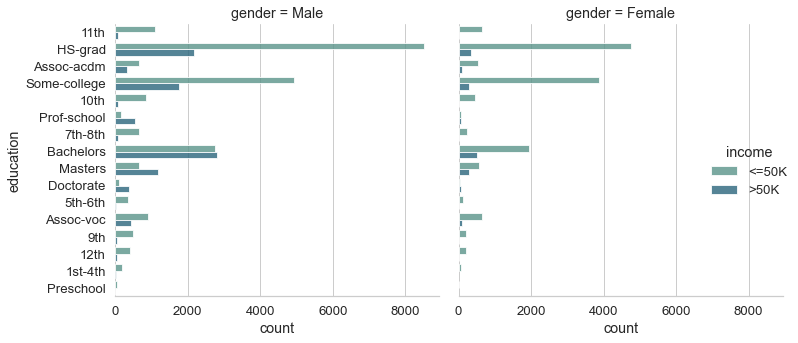

In [24]:
sns.set(font_scale=1.2, style='whitegrid')
plt.figure()
ax = sns.catplot(y='education', hue='income', data=df, orient='h',
            col='gender', palette='crest',  kind='count',
            alpha=.8)
sns.despine(left=True)
plt.tight_layout()

Males with Prof-school, M.S. or Ph.D. usually make more than $50K. The females do not make as much with the same education. 

<Figure size 432x288 with 0 Axes>

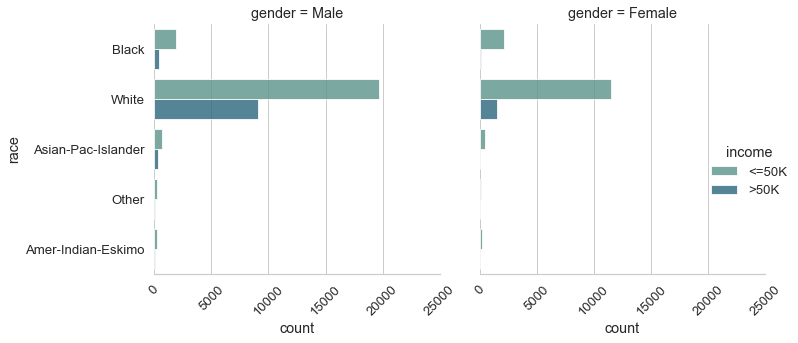

In [25]:
sns.set(font_scale=1.2, style='whitegrid')
plt.figure()
ax = sns.catplot(y='race', hue='income', data=df, 
                 col='gender', palette='crest',  kind='count',
                 orient='h', alpha=.8)

ax.set_xticklabels(rotation = 45)
sns.despine(left=True)
plt.tight_layout()

Almost a third of the white males and Asian-Pac_Islander make above $\$50K$. A tenth of the white females earns more than $\$50K$. Most black people make below $\$50K$.

## Do the marital-status and relationship type affect the salary range?

<Figure size 432x288 with 0 Axes>

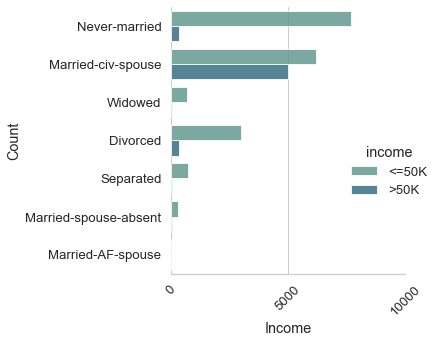

In [26]:
sns.set(font_scale=1.2, style='whitegrid')
plt.figure()
ax = sns.catplot(y='marital-status', hue='income', data=df, 
                 palette='crest',  kind='count',
                 alpha=.8)
plt.xlabel('Income')
plt.ylabel('Count')
ax.set_xticklabels(rotation = 45)
sns.despine(left=True)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

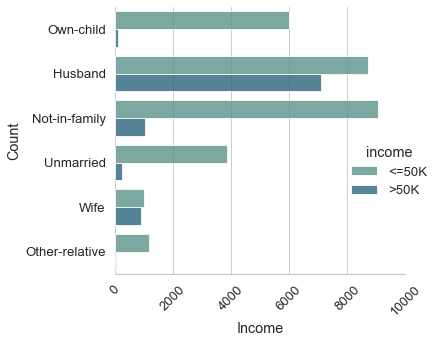

In [27]:
sns.set(font_scale=1.2, style='whitegrid')
plt.figure()
ax = sns.catplot(y='relationship', hue='income', data=df, 
                 palette='crest',  kind='count',
                 alpha=.8)
plt.xlabel('Income')
plt.ylabel('Count')
ax.set_xticklabels(rotation = 45)
sns.despine(left=True)
plt.tight_layout()

Most high earners are married couples. 

## Do couples work more than singles?

In [28]:
df['Relationship Status'] = np.where(df['marital-status'] == 'Married-civ-spouse', 'Couples', 'Singles')

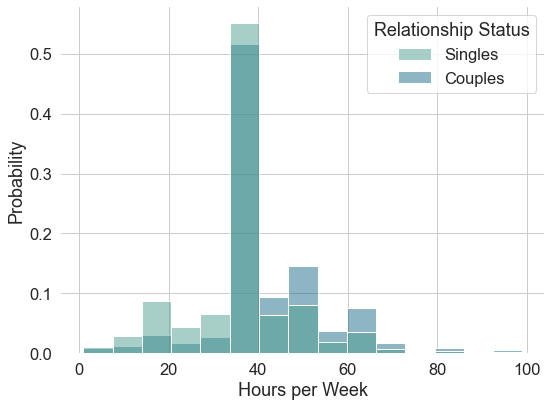

In [29]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(8,6))
sns.histplot(bins=15,
   data=df, x='hours-per-week', hue='Relationship Status', palette='crest',
   alpha=.5, common_norm=False, stat="probability", 
)
plt.ylabel('Probability')
plt.xlabel('Hours per Week')
sns.despine(left=True, bottom=True)
plt.tight_layout()

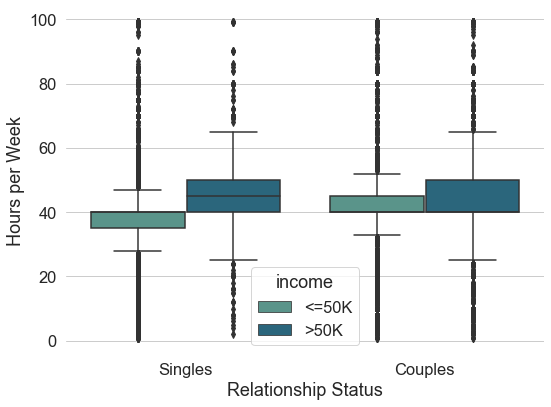

In [30]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(8,6))
sns.boxplot(y='hours-per-week', x='Relationship Status', hue='income', data=df, palette='crest')
sns.despine(left=True, bottom=True)
plt.xlabel('Relationship Status')
plt.ylabel('Hours per Week')
plt.tight_layout()

Couples with income below $50K work more than the singles in the same salary range. For the high earners, the singles work a few more hours per week than the couples do.

## Do adults holding bachelor, master and doctorate degrees have higher salaries but work more hours?

In [31]:
df['education_degree'] = np.where((df['education'] == 'Bachelors') | 
                                  (df['education'] == 'Masters') | 
                                  (df['education'] == 'Doctorate'), 
                                  'B.S, M.S. and Ph.D.', 'Other')

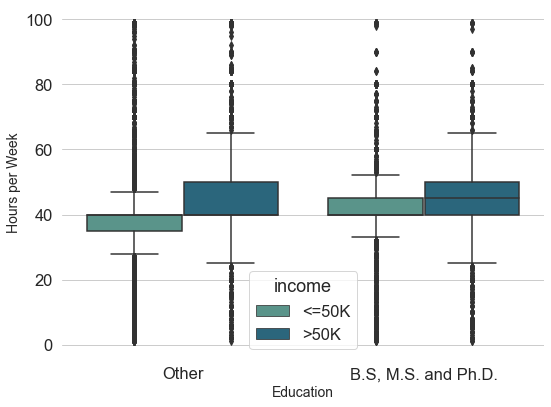

In [32]:
sns.set(font_scale=1.5, style='whitegrid')

plt.figure(figsize=(8,6))
sns.boxplot(y='hours-per-week', x='education_degree', hue='income', data=df, palette='crest')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Hours per Week', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()

In [33]:
df.groupby(['education_degree', 'income'])['hours-per-week'].mean()

education_degree     income
B.S, M.S. and Ph.D.  <=50K     40.673637
                     >50K      45.620219
Other                <=50K     38.481790
                     >50K      45.318630
Name: hours-per-week, dtype: float64

In [34]:
df.groupby(['education_degree', 'income'])['hours-per-week'].median()

education_degree     income
B.S, M.S. and Ph.D.  <=50K     40
                     >50K      45
Other                <=50K     40
                     >50K      40
Name: hours-per-week, dtype: int64

In [35]:
df.groupby(['education_degree', 'income'])['hours-per-week'].quantile(.25)

education_degree     income
B.S, M.S. and Ph.D.  <=50K     40.0
                     >50K      40.0
Other                <=50K     35.0
                     >50K      40.0
Name: hours-per-week, dtype: float64

In [36]:
df.groupby(['education_degree', 'income'])['hours-per-week'].quantile(.75)

education_degree     income
B.S, M.S. and Ph.D.  <=50K     45.0
                     >50K      50.0
Other                <=50K     40.0
                     >50K      50.0
Name: hours-per-week, dtype: float64

Highly educated people tend to work more than the others at both income levels.